# 1. EDA and Data Preprocessing

### Data and information visualization

In [1]:
import os
import plotly.graph_objs as go

base_folder = r'C:\Users\ACER\Desktop\Coconut-Mature-Classification'
subfolders = ['dua non', 'dua nao', 'dua gia']
image_counts = []

# Đếm số lượng ảnh trong mỗi thư mục
for folder in subfolders:
    folder_path = os.path.join(base_folder, folder)
    image_count = len([f for f in os.listdir(folder_path) if f.endswith('.jpg')])  
    image_counts.append(image_count)

# Tạo biểu đồ cột để trực quan hóa số lượng ảnh
fig = go.Figure(data=[go.Bar(x=subfolders, y=image_counts)])
fig.update_layout(title='Class distribution',
                  xaxis_title='Class',
                  yaxis_title='Number of images')

fig.show()

In [33]:
import os
import plotly.graph_objs as go

base_folder = r'C:\Users\ACER\Desktop\Coconut-Mature-Classification'
subfolders = ['dua non', 'dua nao', 'dua gia']
image_counts = []

# Đếm số lượng ảnh trong mỗi thư mục
for folder in subfolders:
    folder_path = os.path.join(base_folder, folder)
    image_count = len([f for f in os.listdir(folder_path) if f.endswith('.jpg')])
    image_counts.append(image_count)

# Tạo biểu đồ tròn để trực quan hóa số lượng ảnh
fig = go.Figure(data=[go.Pie(labels=subfolders, values=image_counts)])
fig.update_layout(title='Class distribution')

fig.show()


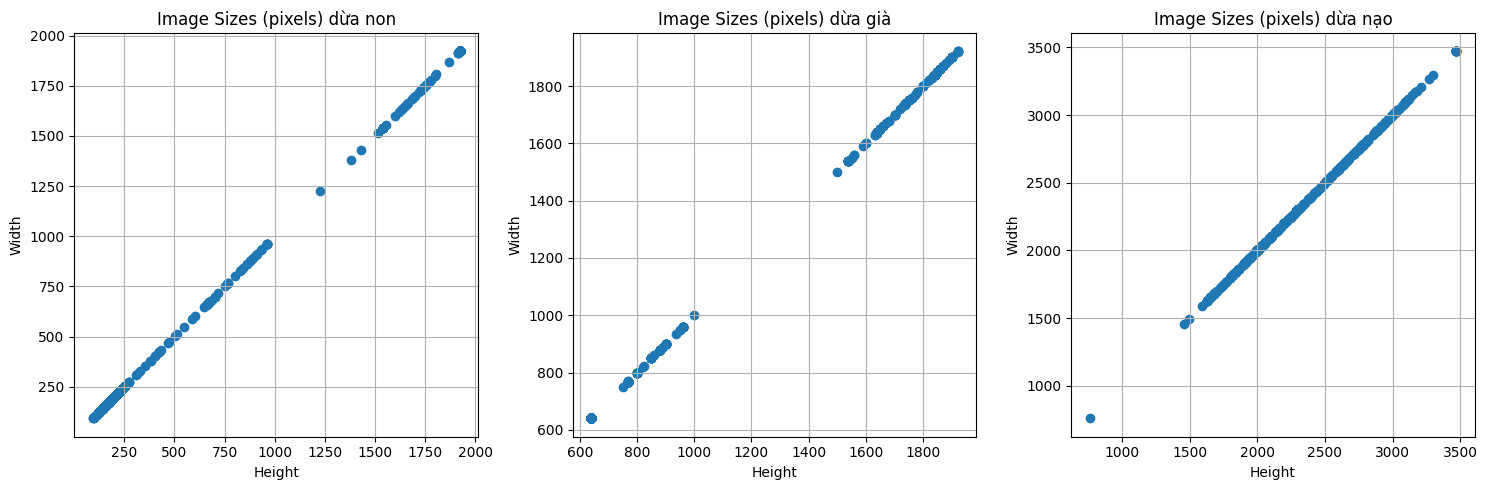

In [2]:
import os
import cv2
import matplotlib.pyplot as plt

classes = ["dừa non", "dừa già", "dừa nạo"]
folders = [
    "C:/Users/ACER/Desktop/Coconut-Mature-Classification/dua non",
    "C:/Users/ACER/Desktop/Coconut-Mature-Classification/dua gia",
    "C:/Users/ACER/Desktop/Coconut-Mature-Classification/dua nao"
]

heights_by_class = [[] for _ in range(len(classes))]
widths_by_class = [[] for _ in range(len(classes))]

for class_idx, folder in enumerate(folders):
    class_name = classes[class_idx]
    image_files = os.listdir(folder)
    for image_file in image_files:
        img_path = os.path.join(folder, image_file)
        img = cv2.imread(img_path)
        height, width, _ = img.shape
        heights_by_class[class_idx].append(height)
        widths_by_class[class_idx].append(width)

plt.figure(figsize=(15, 5))

for class_idx, class_name in enumerate(classes):
    plt.subplot(1, 3, class_idx + 1)
    plt.scatter(heights_by_class[class_idx], widths_by_class[class_idx])
    plt.xlabel('Height')
    plt.ylabel('Width')
    plt.title(f'Image Sizes (pixels) {class_name}')
    plt.grid()

plt.tight_layout()
plt.show()


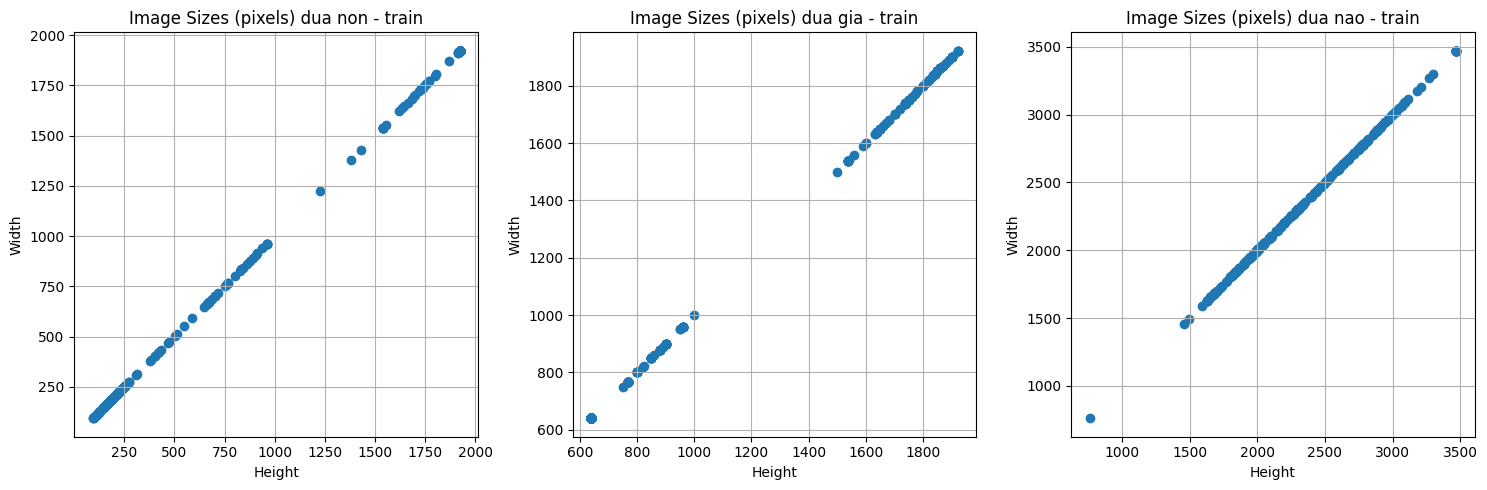

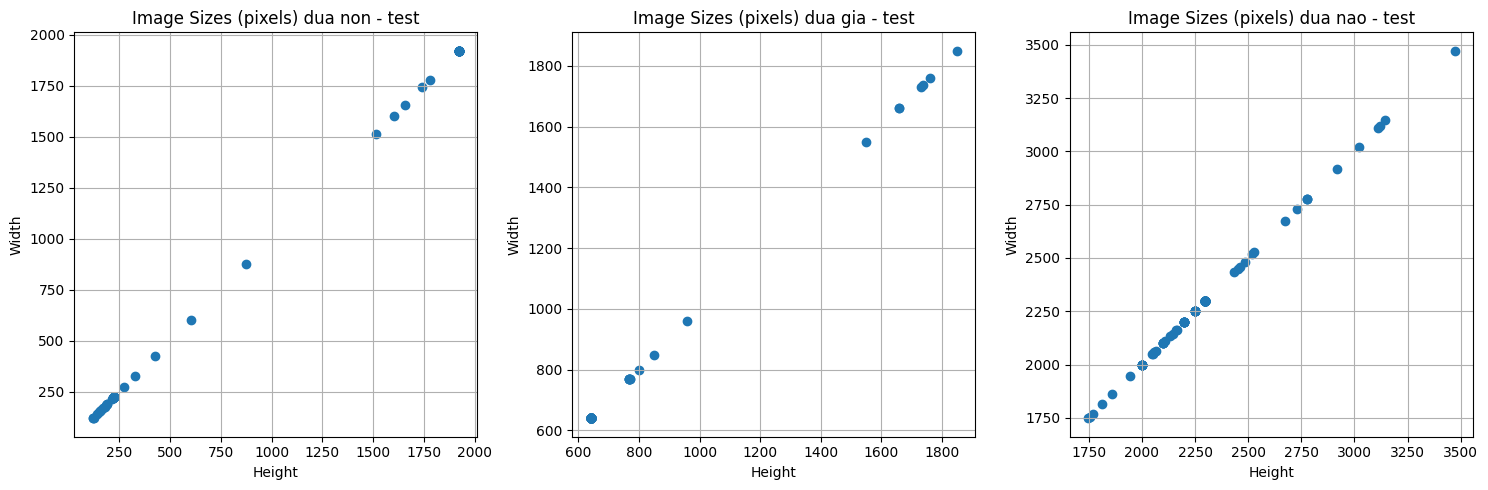

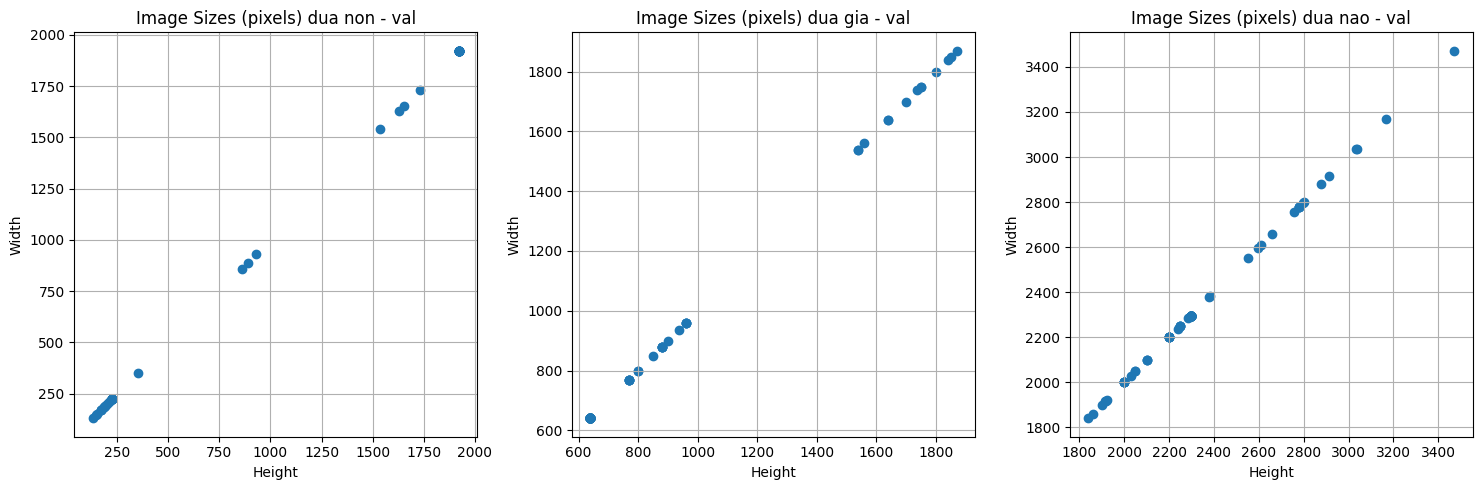

In [3]:
import os
import cv2
import matplotlib.pyplot as plt

base_folder = "C:/Users/ACER/Desktop/Coconut-Mature-Classification/"
classes = ["dua non", "dua gia", "dua nao"]
datasets = ["train", "test", "val"]

heights_by_class = {dataset: [[] for _ in range(len(classes))] for dataset in datasets}
widths_by_class = {dataset: [[] for _ in range(len(classes))] for dataset in datasets}


for dataset in datasets:
    dataset_folder = os.path.join(base_folder, dataset)
    for class_idx, class_name in enumerate(classes):
        class_folder = os.path.join(dataset_folder, class_name)
        image_files = os.listdir(class_folder)
        for image_file in image_files:
            img_path = os.path.join(class_folder, image_file)
            img = cv2.imread(img_path)
            height, width, _ = img.shape
            heights_by_class[dataset][class_idx].append(height)
            widths_by_class[dataset][class_idx].append(width)

for dataset in datasets:
    plt.figure(figsize=(15, 5))
    for class_idx, class_name in enumerate(classes):
        plt.subplot(1, 3, class_idx + 1)
        plt.scatter(heights_by_class[dataset][class_idx], widths_by_class[dataset][class_idx])
        plt.xlabel('Height')
        plt.ylabel('Width')
        plt.title(f'Image Sizes (pixels) {class_name} - {dataset}')
        plt.grid()

    plt.tight_layout()
    plt.show()

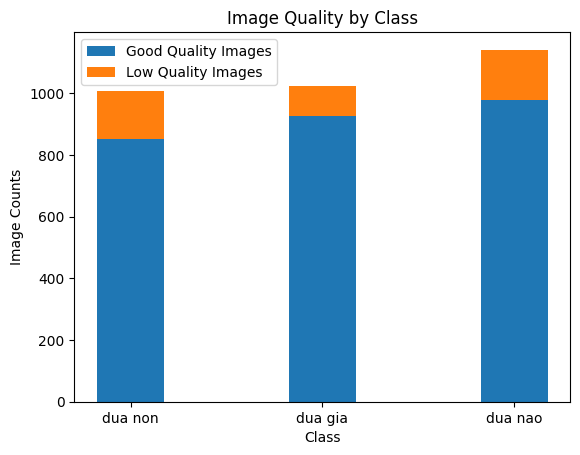

In [4]:
import os
import cv2
import matplotlib.pyplot as plt

folders = [
    "C:/Users/ACER/Desktop/Coconut-Mature-Classification/dua non",
    "C:/Users/ACER/Desktop/Coconut-Mature-Classification/dua gia",
    "C:/Users/ACER/Desktop/Coconut-Mature-Classification/dua nao"
]

# kiểm tra chất lượng ảnh
def check_image_quality(image_path):
    image = cv2.imread(image_path)

    height, width, _ = image.shape
    if height < 50 or width < 50:
        return "Image size too small"
    
    resolution = image.shape[0] * image.shape[1] #diện tích
    if resolution < 1000:
        return "Low resolution"
    
    blurred = cv2.Laplacian(image, cv2.CV_64F).var()
    if blurred < 50:
        return "Blurry image"
    
    return "Good quality"

class_names = []
image_counts = []
low_quality_counts = []

for folder in folders:
    class_name = os.path.basename(folder)
    images = os.listdir(folder)
    good_quality_count = 0
    low_quality_count = 0
    
    for image_name in images:
        image_path = os.path.join(folder, image_name)
        quality = check_image_quality(image_path)
        
        if quality == "Good quality":
            good_quality_count += 1
        else:
            low_quality_count += 1
    
    class_names.append(class_name)
    image_counts.append(good_quality_count)
    low_quality_counts.append(low_quality_count)

fig, ax = plt.subplots()
bar_width = 0.35
index = range(len(class_names))
bar1 = ax.bar(index, image_counts, bar_width, label='Good Quality Images')
bar2 = ax.bar(index, low_quality_counts, bar_width, label='Low Quality Images', bottom=image_counts)

ax.set_xlabel('Class')
ax.set_ylabel('Image Counts')
ax.set_title('Image Quality by Class')
ax.set_xticks(index)
ax.set_xticklabels(class_names)
ax.legend()

plt.show()


### Data Augmentation

In [ ]:
# import os
# import random
# from torchvision import transforms
# from PIL import Image

# original_dua_non_path = r"C:\Users\ACER\Desktop\Coconut-Mature-Classification\dua non"

# # Số lượng ảnh bạn muốn tạo
# num_augmented_images = 600

# # Biến đổi dữ liệu
# data_augmentation = transforms.Compose([
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(10),
#     transforms.RandomResizedCrop(224, scale=(0.8, 1.0)), 
#     transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  xoay ảnh một góc độ ngẫu nhiên (0 độ) và dịch ngẫu nhiên theo chiều ngang và chiều dọc (10% chiều rộng và chiều cao ).
#     transforms.RandomPerspective(distortion_scale=0.2, p=0.5), 
# ])

# # Lấy số cuối cùng trong tên ảnh gốc
# last_image_number = max([int(file.split('.')[0]) for file in os.listdir(original_dua_non_path) if file.endswith('.jpg')], default=0)
# image_count = last_image_number + 1
# original_images = []
# for file in os.listdir(original_dua_non_path):
#     if file.endswith('.jpg'):
#         original_images.append(file)

# # Lặp để tạo thêm ảnh mới
# for i in range(num_augmented_images):
#     original_image_path = os.path.join(original_dua_non_path, random.choice(original_images))
#     new_image_name = f'{image_count}.jpg'
#     new_image_path = os.path.join(original_dua_non_path, new_image_name)
#     image = Image.open(original_image_path)
#     augmented_image = data_augmentation(image)
#     augmented_image = augmented_image.convert('RGB')
#     augmented_image.save(new_image_path, 'JPEG')
#     image_count += 1

# print("Finished")


### Create a train/val/test split

In [ ]:
# import os
# import shutil
# import random

# # Đường dẫn đến thư mục chứa dữ liệu hình ảnh
# data_dir = r'C:\Users\ACER\Desktop\Coconut-Mature-Classification\dua nao'

# # Đường dẫn đến thư mục chứa tập dữ liệu huấn luyện, kiểm tra và kiểm định
# train_dir = r'C:\Users\ACER\Desktop\Coconut-Mature-Classification\train\dua nao'
# val_dir = r'C:\Users\ACER\Desktop\Coconut-Mature-Classification\val\dua nao'
# test_dir = r'C:\Users\ACER\Desktop\Coconut-Mature-Classification\test\dua nao'

# # Tạo thư mục nếu chưa tồn tại
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(val_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)

# # Lấy danh sách tất cả các tệp hình ảnh trong thư mục dữ liệu
# image_files = os.listdir(data_dir)

# # Xáo trộn danh sách tệp hình ảnh
# random.shuffle(image_files)

# # Tính số lượng tệp cho mỗi phần
# total_images = len(image_files)
# train_split = int(0.8 * total_images)
# val_split = int(0.1 * total_images)

# # Chia tệp hình ảnh thành các phần
# train_files = image_files[:train_split]
# val_files = image_files[train_split:train_split + val_split]
# test_files = image_files[train_split + val_split:]

# # Di chuyển các tệp hình ảnh vào các thư mục tương ứng
# for file in train_files:
#      src = os.path.join(data_dir, file)
#      dst = os.path.join(train_dir, file)
#      shutil.copy(src, dst)

# for file in val_files:
#      src = os.path.join(data_dir, file)
#      dst = os.path.join(val_dir, file)
#      shutil.copy(src, dst)

# for file in test_files:
#      src = os.path.join(data_dir, file)
#      dst = os.path.join(test_dir, file)
#      shutil.copy(src, dst)

# print("Finished")

In [5]:
import os
import plotly.express as px

base_folder = r'C:\Users\ACER\Desktop\Coconut-Mature-Classification'
data_sets = ['train', 'test', 'val']
data = {'Set': [], 'Class': [], 'Number of images': []}

for data_set in data_sets:
    dataset_folder = os.path.join(base_folder, data_set)

    for class_folder in os.listdir(dataset_folder):
        class_path = os.path.join(dataset_folder, class_folder)
        if os.path.isdir(class_path):
            data['Set'].append(data_set)
            data['Class'].append(class_folder)
            data['Number of images'].append(len(os.listdir(class_path)))

fig = px.bar(data, x='Class', y='Number of images', color='Set',
             title='Class distribution')
fig.show()

In [6]:
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import torch.optim as optim
from glob import glob
from tqdm import tqdm
import random
from torch.utils.data import DataLoader

In [7]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


train_data = torchvision.datasets.ImageFolder(root=r'C:\Users\ACER\Desktop\Coconut-Mature-Classification\train', transform=train_transforms)
val_data = torchvision.datasets.ImageFolder(root=r'C:\Users\ACER\Desktop\Coconut-Mature-Classification\val', transform=val_transforms)

In [8]:
num_classes = len(train_data.classes)
classes_name = train_data.classes
classes2idx = train_data.class_to_idx

print(f"Number of classes: {num_classes}")
print(f"Classes names: {classes_name}")
print(f"Labels mapping: {classes2idx}")
print("Number of train: ", len(train_data))
print("Number of val: ", len(val_data))

Number of classes: 3
Classes names: ['dua gia', 'dua nao', 'dua non']
Labels mapping: {'dua gia': 0, 'dua nao': 1, 'dua non': 2}
Number of train:  2537
Number of val:  316


In [9]:
import os
from glob import glob
from tqdm import tqdm
import plotly.express as px

# Danh sách đường dẫn đến thư mục
all_class = glob(os.path.join(r"C:\Users\ACER\Desktop\Coconut-Mature-Classification\train", "*"))
train_class_counts = {}

# Lấy tên thư mục cuối cùng từ đường dẫn và sử dụng nó làm tên cột
for folder_class in tqdm(all_class, desc='run'):
    class_name = os.path.basename(folder_class)  # Lấy tên thư mục cuối cùng
    count = len(glob(os.path.join(folder_class, "*")))
    train_class_counts[class_name] = count

data = {'Class': list(train_class_counts.keys()), 'Count': list(train_class_counts.values())}

fig = px.bar(data, x='Class', y='Count', title='Train Set Distribution')
fig.update_xaxes(categoryorder='total descending')  # Sắp xếp theo thứ tự giảm dần

fig.show()


run: 100%|██████████| 3/3 [00:00<00:00, 379.99it/s]


In [10]:
# Danh sách đường dẫn đến thư mục
all_class = glob(os.path.join(r"C:\Users\ACER\Desktop\Coconut-Mature-Classification\test", "*"))
train_class_counts = {}

for folder_class in tqdm(all_class, desc='run'):
    class_name = os.path.basename(folder_class)  # Lấy tên thư mục cuối cùng
    count = len(glob(os.path.join(folder_class, "*")))
    train_class_counts[class_name] = count

data = {'Class': list(train_class_counts.keys()), 'Count': list(train_class_counts.values())}

fig = px.bar(data, x='Class', y='Count', title='Train Set Distribution')
fig.update_xaxes(categoryorder='total descending')  # Sắp xếp theo thứ tự giảm dần

fig.show()

run: 100%|██████████| 3/3 [00:00<00:00, 1503.69it/s]


## 2. Modeling

In [36]:
#!pip install -U scikit-learn

In [12]:
import torch
import torch.nn as nn
import torchvision.models as models
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy

In [13]:
import torch
import torch.nn as nn
import torchvision.models as models

# Tạo mô hình MobileNetV2
model = models.mobilenet_v2(pretrained=True)
num_classes = 3  
model.classifier[1] = nn.Linear(model.last_channel, num_classes)

for param in model.features.parameters():
    param.requires_grad = False

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.



In [14]:
random_image = torch.rand(1, 3, 224, 224)
model(random_image).shape

torch.Size([1, 3])

In [15]:
print("# Parameters", sum(p.numel() for p in model.parameters()))

# Parameters 2227715


## 3. Training Model

In [16]:
import torch.optim as optim
from sklearn.metrics import f1_score
from torch.utils.data import DataLoader

In [17]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
EPOCHS = 30
BATCH_SIZE = 64
#BATCH_SIZE = 64


# Create data loaders
TRAINLOADER = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
TESTLOADER = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)
DEVICE

device(type='cuda')

In [18]:
model.to(DEVICE)

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [35]:
#!pip install lion-pytorch
from lion_pytorch import Lion

In [20]:
# Loss
criterion = nn.CrossEntropyLoss()
# Optimizer and Scheduler
optimizer = Lion(model.parameters(), lr=1e-4, weight_decay=1e-2)

In [21]:
# Define a filename for saving the model
model_save_path = 'MobileNetV2.pt'

# Define early stopping parameters
patience = 5
best_validation_loss = float('inf')
no_improvement_count = 0

loss_train = []
loss_test = []
f1_train = []
f1_test = []

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    predictions_train = []
    true_labels_train = []

    for i, data in tqdm(enumerate(TRAINLOADER), desc='train'):
        inputs, labels = data
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        predictions_train.extend(predicted.tolist())
        true_labels_train.extend(labels.tolist())

    train_loss = running_loss / len(TRAINLOADER)
    train_f1 = f1_score(true_labels_train, predictions_train, average='weighted')

    loss_train.append(train_loss)
    f1_train.append(train_f1)

    model.eval()
    test_loss_val = 0.0
    predictions = []
    true_labels = []

    with torch.no_grad():
        for data in TESTLOADER:
            # Validation steps as in your code
            inputs, labels = data
            inputs = inputs.to(DEVICE)
            labels = labels.to(DEVICE)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss_val += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            predictions.extend(predicted.tolist())
            true_labels.extend(labels.tolist())

    test_loss_val /= len(TESTLOADER)
    test_f1_val = f1_score(true_labels, predictions, average='weighted')

    loss_test.append(test_loss_val)
    f1_test.append(test_f1_val)
    print(f'Epoch [{epoch + 1}/{EPOCHS}]  - Train Loss: {train_loss:.4f} - Train F1: {train_f1:.4f} - Test Loss: {test_loss_val:.4f} - Test F1: {test_f1_val:.4f}')

    # Check if validation loss has improved
    if test_loss_val < best_validation_loss:
        best_validation_loss = test_loss_val
        no_improvement_count = 0

        # Save the model when validation loss improves
        torch.save(model.state_dict(), model_save_path)
    else:
        no_improvement_count += 1

    # If no improvement for 'early_stopping_patience' epochs, stop training
    if no_improvement_count >= patience:
        print(f'Early stopping after {epoch + 1} epochs due to no improvement in validation loss.')
        break

print('Finished Training')

train: 40it [01:14,  1.86s/it]


Epoch [1/30]  - Train Loss: 0.9840 - Train F1: 0.5430 - Test Loss: 0.7707 - Test F1: 0.8063


train: 40it [01:02,  1.56s/it]


Epoch [2/30]  - Train Loss: 0.6229 - Train F1: 0.8732 - Test Loss: 0.4756 - Test F1: 0.9362


train: 40it [01:01,  1.54s/it]


Epoch [3/30]  - Train Loss: 0.4045 - Train F1: 0.9241 - Test Loss: 0.3133 - Test F1: 0.9458


train: 40it [00:59,  1.50s/it]


Epoch [4/30]  - Train Loss: 0.2801 - Train F1: 0.9343 - Test Loss: 0.2257 - Test F1: 0.9489


train: 40it [01:04,  1.62s/it]


Epoch [5/30]  - Train Loss: 0.2191 - Train F1: 0.9350 - Test Loss: 0.1736 - Test F1: 0.9490


train: 40it [00:59,  1.49s/it]


Epoch [6/30]  - Train Loss: 0.1754 - Train F1: 0.9462 - Test Loss: 0.1408 - Test F1: 0.9618


train: 40it [01:03,  1.59s/it]


Epoch [7/30]  - Train Loss: 0.1421 - Train F1: 0.9533 - Test Loss: 0.1260 - Test F1: 0.9525


train: 40it [01:04,  1.62s/it]


Epoch [8/30]  - Train Loss: 0.1281 - Train F1: 0.9554 - Test Loss: 0.1068 - Test F1: 0.9620


train: 40it [01:02,  1.57s/it]


Epoch [9/30]  - Train Loss: 0.1006 - Train F1: 0.9628 - Test Loss: 0.0949 - Test F1: 0.9651


train: 40it [01:06,  1.66s/it]


Epoch [10/30]  - Train Loss: 0.0937 - Train F1: 0.9652 - Test Loss: 0.0844 - Test F1: 0.9652


train: 40it [01:02,  1.55s/it]


Epoch [11/30]  - Train Loss: 0.0862 - Train F1: 0.9704 - Test Loss: 0.0814 - Test F1: 0.9589


train: 40it [01:06,  1.66s/it]


Epoch [12/30]  - Train Loss: 0.0812 - Train F1: 0.9732 - Test Loss: 0.0736 - Test F1: 0.9779


train: 40it [01:09,  1.75s/it]


Epoch [13/30]  - Train Loss: 0.0646 - Train F1: 0.9759 - Test Loss: 0.0676 - Test F1: 0.9779


train: 40it [01:02,  1.57s/it]


Epoch [14/30]  - Train Loss: 0.0634 - Train F1: 0.9775 - Test Loss: 0.0646 - Test F1: 0.9747


train: 40it [01:07,  1.69s/it]


Epoch [15/30]  - Train Loss: 0.0523 - Train F1: 0.9834 - Test Loss: 0.0684 - Test F1: 0.9683


train: 40it [00:59,  1.49s/it]


Epoch [16/30]  - Train Loss: 0.0528 - Train F1: 0.9850 - Test Loss: 0.0604 - Test F1: 0.9873


train: 40it [01:05,  1.63s/it]


Epoch [17/30]  - Train Loss: 0.0476 - Train F1: 0.9850 - Test Loss: 0.0623 - Test F1: 0.9747


train: 40it [01:00,  1.50s/it]


Epoch [18/30]  - Train Loss: 0.0440 - Train F1: 0.9850 - Test Loss: 0.0641 - Test F1: 0.9746


train: 40it [01:03,  1.58s/it]


Epoch [19/30]  - Train Loss: 0.0423 - Train F1: 0.9866 - Test Loss: 0.0618 - Test F1: 0.9778


train: 40it [01:00,  1.51s/it]


Epoch [20/30]  - Train Loss: 0.0483 - Train F1: 0.9803 - Test Loss: 0.0622 - Test F1: 0.9810


train: 40it [01:03,  1.58s/it]


Epoch [21/30]  - Train Loss: 0.0413 - Train F1: 0.9886 - Test Loss: 0.0579 - Test F1: 0.9778


train: 40it [01:03,  1.59s/it]


Epoch [22/30]  - Train Loss: 0.0386 - Train F1: 0.9886 - Test Loss: 0.0616 - Test F1: 0.9810


train: 40it [01:02,  1.57s/it]


Epoch [23/30]  - Train Loss: 0.0347 - Train F1: 0.9890 - Test Loss: 0.0569 - Test F1: 0.9810


train: 40it [01:02,  1.56s/it]


Epoch [24/30]  - Train Loss: 0.0436 - Train F1: 0.9823 - Test Loss: 0.0567 - Test F1: 0.9810


train: 40it [01:01,  1.53s/it]


Epoch [25/30]  - Train Loss: 0.0343 - Train F1: 0.9890 - Test Loss: 0.0632 - Test F1: 0.9746


train: 40it [01:05,  1.63s/it]


Epoch [26/30]  - Train Loss: 0.0350 - Train F1: 0.9874 - Test Loss: 0.0543 - Test F1: 0.9810


train: 40it [01:08,  1.72s/it]


Epoch [27/30]  - Train Loss: 0.0313 - Train F1: 0.9921 - Test Loss: 0.0580 - Test F1: 0.9778


train: 40it [01:07,  1.68s/it]


Epoch [28/30]  - Train Loss: 0.0263 - Train F1: 0.9937 - Test Loss: 0.0543 - Test F1: 0.9810


train: 40it [01:15,  1.89s/it]


Epoch [29/30]  - Train Loss: 0.0303 - Train F1: 0.9913 - Test Loss: 0.0559 - Test F1: 0.9810


train: 40it [01:05,  1.64s/it]


Epoch [30/30]  - Train Loss: 0.0311 - Train F1: 0.9901 - Test Loss: 0.0593 - Test F1: 0.9778
Finished Training


### Visualing Model 

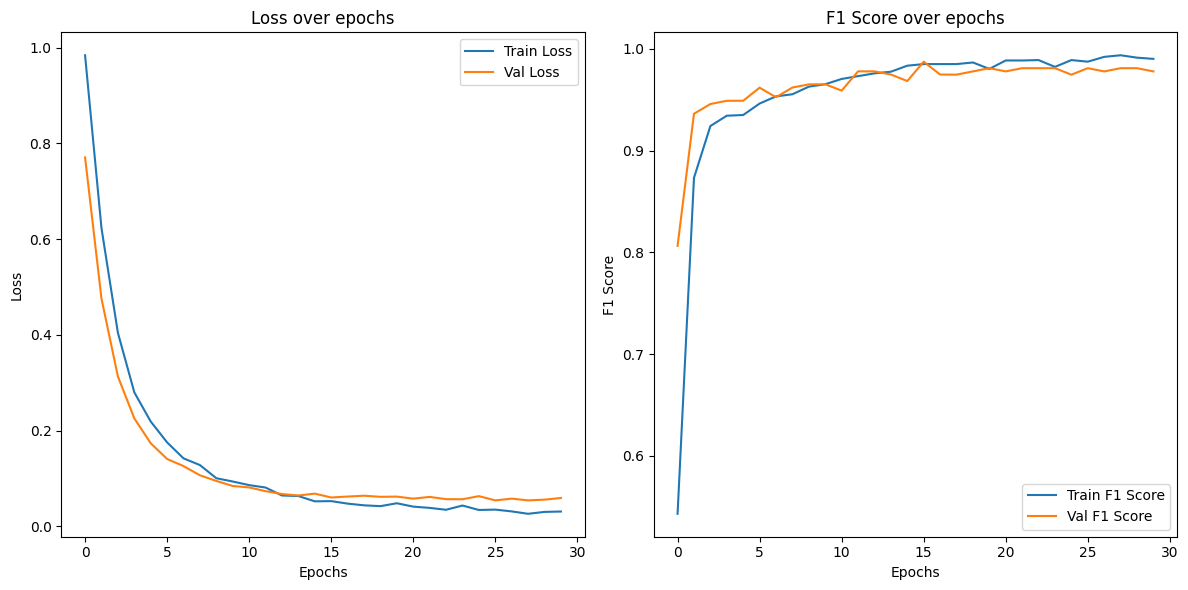

In [22]:
# Plotting the metrics
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(loss_train, label='Train Loss')
plt.plot(loss_test, label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(f1_train, label='Train F1 Score')
plt.plot(f1_test, label='Val F1 Score')
plt.title('F1 Score over epochs')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

### Visualizing Model Architecture

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
from torchviz import make_dot

model_save_path = 'MobileNetV2.pt'

# Create an instance of your model
model = models.vgg11(pretrained=False)
num_classes = 3  
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)

# Load the model's weights
model.load_state_dict(torch.load(model_save_path))
example_input = torch.randn(1, 3, 224, 224) 

# Create a visualization of the model
visualization = make_dot(model(example_input), params=dict(model.named_parameters()))
visualization.view()

## 4. Evaluating

In [24]:
model = models.mobilenet_v2(num_classes=3)
model.load_state_dict(torch.load(r"C:\Users\ACER\Desktop\Coconut-Mature-Classification\MobileNetV2.pt"))

<All keys matched successfully>

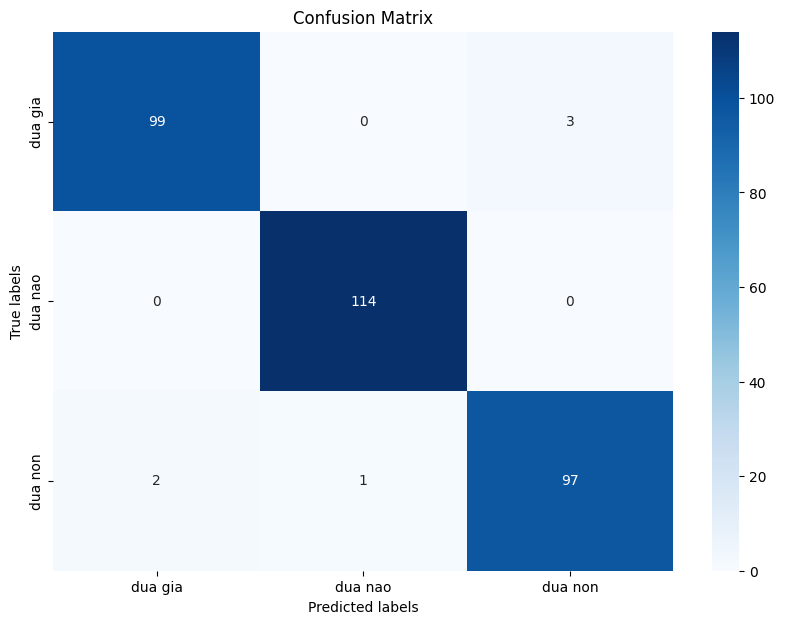

In [25]:
model.to(DEVICE)
model.eval()
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for data in TESTLOADER:
        inputs, labels = data
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_predictions.extend(predicted.cpu().tolist())
        all_true_labels.extend(labels.cpu().tolist())


# Compute confusion matrix
cm = confusion_matrix(all_true_labels, all_predictions)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes_name, yticklabels=classes_name)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
f1 = f1_score(all_true_labels, all_predictions, average='weighted')
print("Weighted F1 Score:", f1)

Weighted F1 Score: 0.980980595364486


In [27]:
print(classification_report(all_true_labels, all_predictions, target_names=classes_name))

              precision    recall  f1-score   support

     dua gia       0.98      0.97      0.98       102
     dua nao       0.99      1.00      1.00       114
     dua non       0.97      0.97      0.97       100

    accuracy                           0.98       316
   macro avg       0.98      0.98      0.98       316
weighted avg       0.98      0.98      0.98       316



## 5. Inference

In [30]:
from PIL import Image

In [28]:
model = models.mobilenet_v2(num_classes=3)
model.load_state_dict(torch.load(r"C:\Users\ACER\Desktop\Coconut-Mature-Classification\MobileNetV2.pt"))
model.eval()

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [31]:
# Load your image and preprocess it
image_path = r'C:\Users\ACER\Desktop\Coconut-Mature-Classification\test\dua gia\139.jpg'
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
input_data = preprocess(image).unsqueeze(0)  # Add a batch dimension

# Perform inference
with torch.no_grad():
    output = model(input_data)

# Post-process the output to get class probabilities
probabilities = torch.softmax(output, dim=1)

# Get the predicted class (class with the highest probability)
predicted_class = torch.argmax(probabilities, dim=1)

# Print or use the predicted class
print("Predicted Class:", predicted_class.item())

Predicted Class: 0


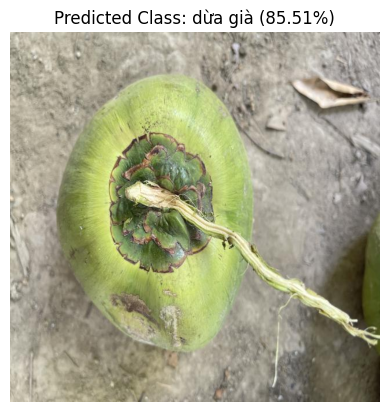

In [32]:
import matplotlib.pyplot as plt

# Define a list of class names in the order they correspond to the model's output
class_names = ["dừa già", "dừa nạo", "dừa non"]

# Load your image and preprocess it
image_path = r'C:\Users\ACER\Desktop\Coconut-Mature-Classification\dua gia\1007.jpg'
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
input_data = preprocess(image).unsqueeze(0)  # Add a batch dimension

# Perform inference
with torch.no_grad():
    output = model(input_data)

# Post-process the output to get class probabilities
probabilities = torch.softmax(output, dim=1)

# Get the predicted class (class with the highest probability)
predicted_class = torch.argmax(probabilities, dim=1)

# Use the predicted class to get the class name
predicted_class_index = predicted_class.item()
predicted_class_name = class_names[predicted_class_index]

# Get the percentage of the predicted class's probability
percentage = torch.max(probabilities).item() * 100

# Display the image with the predicted class name and percentage
plt.imshow(image)
plt.title(f"Predicted Class: {predicted_class_name} ({percentage:.2f}%)")
plt.axis('off')  # Turn off axis labels and ticks
plt.show()


### Predict on File Original Data

In [ ]:
import os
from PIL import Image
import torchvision.transforms as transforms
import torch
from torchvision import models
import matplotlib.pyplot as plt

class_names = ["dừa già", "dừa nạo", "dừa non"]

test_dir = r'C:\Users\ACER\Desktop\Coconut-Mature-Classification\dua gia'

# Define the path to your model
model_path = r"C:\Users\ACER\Desktop\Coconut-Mature-Classification\Vgg11_model.pt"
# Load your model
model = models.vgg11(pretrained=False)  
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
model.load_state_dict(torch.load(model_path))
model.eval()

# Create variables to store the counts of different coconut types
count_gia = 0
count_nao = 0
count_non = 0

# Define the image preprocessing transformation
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Calculate the number of rows and columns in the grid for each plot
num_images = len(os.listdir(test_dir))
num_columns = 3
num_rows = (num_images + num_columns - 1) // num_columns

# Calculate the number of plots needed to display 3 images each
num_plots = (num_images + 2) // 3

# Create subplots for each set of 3 images
for plot_number in range(num_plots):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    for i in range(3):
        image_index = plot_number * 3 + i
        if image_index < num_images:
            filename = os.listdir(test_dir)[image_index]
            if filename.endswith('.jpg'):
                image_path = os.path.join(test_dir, filename)
                image = Image.open(image_path)
                input_data = preprocess(image).unsqueeze(0)  # Add a batch dimension


                with torch.no_grad():
                    output = model(input_data)

                probabilities = torch.softmax(output, dim=1)

                predicted_class = torch.argmax(probabilities, dim=1)

                predicted_class_index = predicted_class.item()
                predicted_class_name = class_names[predicted_class_index]

                axs[i].imshow(image)
                axs[i].set_title("Predicted Class: " + predicted_class_name)
                axs[i].axis('off')

                if predicted_class_name == "dừa già":
                    count_gia += 1
                elif predicted_class_name == "dừa nạo":
                    count_nao += 1
                elif predicted_class_name == "dừa non":
                    count_non += 1

    plt.tight_layout()
    plt.show()

print(f"Total images: {num_images}")
print(f"Count of 'dừa già': {count_gia}")
print(f"Count of 'dừa nạo': {count_nao}")
print(f"Count of 'dừa non': {count_non}")
